<a href="https://colab.research.google.com/github/CAAbishek/Navigate-Labs/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Processing
Load the dataset and check for missing values or any inconsistencies. Perform necessary data cleaning tasks if required.


TASK 1


In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/sample_data/Crop_recommendation.csv')

### Task 2:

Find how many rows are there in the dataset

In [2]:
num_rows = df.shape[0]

print("Number of rows:", num_rows)

Number of rows: 2200


### Task 3:

Find rows that contain missing values, if any
Print all the columns that contains null/ missing values


In [3]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
print("Rows with missing values:\n", rows_with_missing_values)

# Find columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]
print("Columns with missing values:", columns_with_missing_values)

Rows with missing values:
 Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []
Columns with missing values: Index([], dtype='object')


### Task 4:

Find min, max, mean, median, and standard deviation of all the columns in this dataset

In [4]:
for column in df.select_dtypes(include=['number']).columns:
    print(f"Column: {column}")
    print(f"Min: {df[column].min()}")
    print(f"Max: {df[column].max()}")
    print(f"Mean: {df[column].mean()}")
    print(f"Median: {df[column].median()}")
    print(f"Standard Deviation: {df[column].std()}\n")

Column: N
Min: 0
Max: 140
Mean: 50.551818181818184
Median: 37.0
Standard Deviation: 36.91733383375668

Column: P
Min: 5
Max: 145
Mean: 53.36272727272727
Median: 51.0
Standard Deviation: 32.985882738587144

Column: K
Min: 5
Max: 205
Mean: 48.14909090909091
Median: 32.0
Standard Deviation: 50.64793054666006

Column: temperature
Min: 8.825674745
Max: 43.67549305
Mean: 25.616243851779544
Median: 25.5986932
Standard Deviation: 5.063748599958843

Column: humidity
Min: 14.25803981
Max: 99.98187601
Mean: 71.48177921778637
Median: 80.473145665
Standard Deviation: 22.263811589761115

Column: ph
Min: 3.504752314
Max: 9.93509073
Mean: 6.469480065256364
Median: 6.42504527
Standard Deviation: 0.7739376880298721

Column: rainfall
Min: 20.21126747
Max: 298.5601175
Mean: 103.46365541576817
Median: 94.86762427
Standard Deviation: 54.95838852487811



## 2. Data Pre-Processing

**What is the purpose of data pre-processing?**

Data pre-processing is the process of preparing and cleaning raw data to make it suitable for analysis. It involves tasks such as data cleaning, transformation, and feature engineering.

### Task 5:

1. if the column is numerics, replace them with the mean of the column.
2. if they column is categorical, replace them with the maximim occuring value of the column.

In [6]:
def replace_missing_values(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column].fillna(df[column].mean(), inplace=True)
        else:
          df[column].fillna(df[column].mode()[0], inplace=True)

replace_missing_values(df)

print(df)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


<ipython-input-6-79b600ed1445>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-6-79b600ed1445>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

## 3. Feature Engineering
Analyze the features available in the dataset and perform feature engineering if needed. This may include creating new features or transforming existing ones.





### Task 6:

1. Apply Binning/Discretization Feature Engineering Techniques on N - ratio of Nitrogen content in soil feature
2. Find which bin (low, medium, high) has the most number of observations
3. Find which bin (low, medium, high) has the least number of observations

**Description:** Divide the continuous values of Nitrogen content into discrete bins (e.g., low, medium, high). This can be helpful if specific ranges of nitrogen levels correlate better with certain crop types.

In [50]:
import pandas as pd

# Assuming you have a CSV file named 'crop_data.csv'
df = pd.read_csv('/content/sample_data/Crop_recommendation.csv')

# Define bins and labels
bins = [0, 20, 30, float('inf')]
labels = ['low', 'medium', 'high']

# Create a new column 'N_ratio_bin' with binned values
df['N_ratio_bin'] = pd.cut(df['N_ratio'], bins=bins, labels=labels)

# Count observations in each bin
bin_counts = df['N_ratio_bin'].value_counts()

# Find the bin with the most observations
most_common_bin = bin_counts.idxmax()
print("Bin with the most observations:", most_common_bin)

# Find the bin with the least observations
least_common_bin = bin_counts.idxmin()
print("Bin with the least observations:", least_common_bin)

KeyError: 'N_ratio'

### Task 7:


1. Apply Normalization/Scaling on P - ratio of Phosphorous content in soil - kg/ha feature
2. explain the gap between 0.6 and 0.8 in the above visual

**Description:** Scale the nitrogen content values to a range, such as [0, 1] or standardize to have a mean of 0 and a standard deviation of 1. This is particularly useful for algorithms that are sensitive to feature magnitude, like neural networks or gradient-based methods.

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample data
data = {'P_ratio': [10, 25, 30, 15, 40, 20, 35, 18, 22, 28]}
df = pd.DataFrame(data)

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the 'P_ratio' column
df['P_ratio_normalized'] = scaler.fit_transform(df[['P_ratio']])

print(df)

   P_ratio  P_ratio_normalized
0       10            0.000000
1       25            0.500000
2       30            0.666667
3       15            0.166667
4       40            1.000000
5       20            0.333333
6       35            0.833333
7       18            0.266667
8       22            0.400000
9       28            0.600000


### Task: 8

Analyze the relationship between crop type and rainfall to determine which crops grow well under higher rainfall conditions. Visualize the data using an appropriate plot to gain insights into the rainfall preferences of different crops.

**Hint:** Use a boxplot from the seaborn library to visualize the distribution of rainfall for each crop type. The x-axis should represent the crop types, and the y-axis should show the amount of rainfall. This will help you identify which crops have higher median and upper quartile values, indicating their preference for more rainfall.

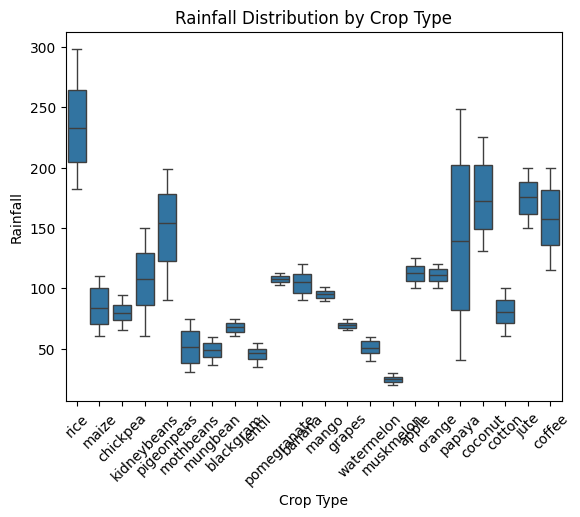

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a CSV file named 'crop_data.csv'
df = pd.read_csv('/content/sample_data/Crop_recommendation.csv')

# Create a box plot
sns.boxplot(x='label', y='rainfall', data=df)
plt.title('Rainfall Distribution by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Rainfall')
plt.xticks(rotation=45)
plt.show()

### Task 9

Analyze the relationship between temperature and crop type to determine if certain crops prefer specific temperature ranges. Visualize the temperature distribution for each crop using a violin plot or swarm plot to identify any patterns or trends in the data.

**Hint:** Use a violin plot or swarm plot from the seaborn library. For a violin plot, set the x-axis to represent the crop types and the y-axis to show temperature values, which will help visualize the spread and density of temperatures for each crop. Alternatively, use a swarm plot to display individual temperature data points for each crop type, which provides insights into clustering and spread.

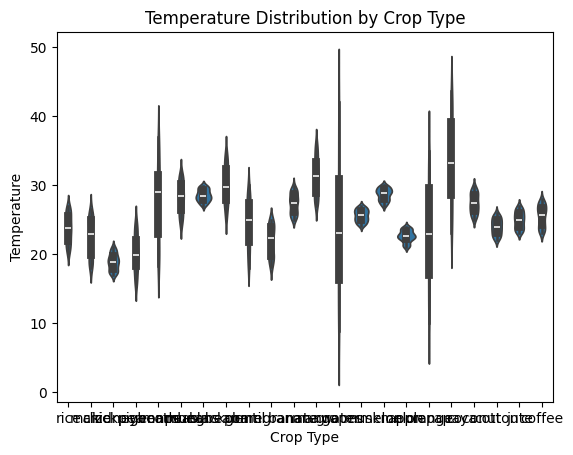

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 73.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 47.0% of the points cannot be plac

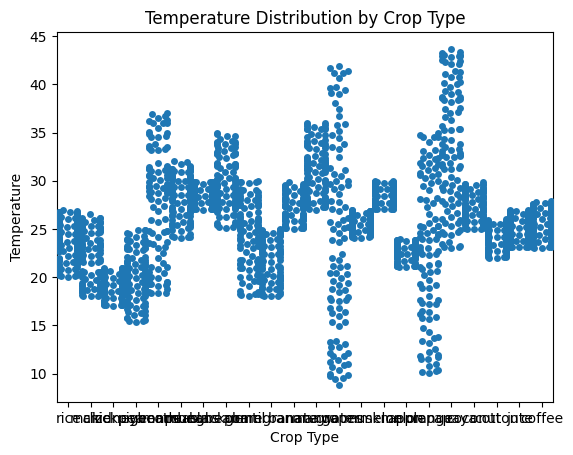

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a CSV file named 'crop_data.csv'
df = pd.read_csv('/content/sample_data/Crop_recommendation.csv')

# Create a violin plot
sns.violinplot(x='label', y='temperature', data=df)
plt.title('Temperature Distribution by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Temperature')
plt.show()

# Create a swarm plot
sns.swarmplot(x='label', y='temperature', data=df)
plt.title('Temperature Distribution by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Temperature')
plt.show()

### Task 10:

Perform a correlation analysis between the features (N, P, K, temperature, humidity, ph, and rainfall). Identify which features are strongly correlated with each other. Visualize these correlations using a heatmap and discuss how these relationships might impact crop growth or recommendations.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a CSV file named 'crop_data.csv'
df = pd.read_csv('/content/sample_data/Crop_recommendation.csv')


In [20]:
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [22]:
df.dropna(inplace=True)  # Remove rows with missing values

In [23]:
print(df.dtypes)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


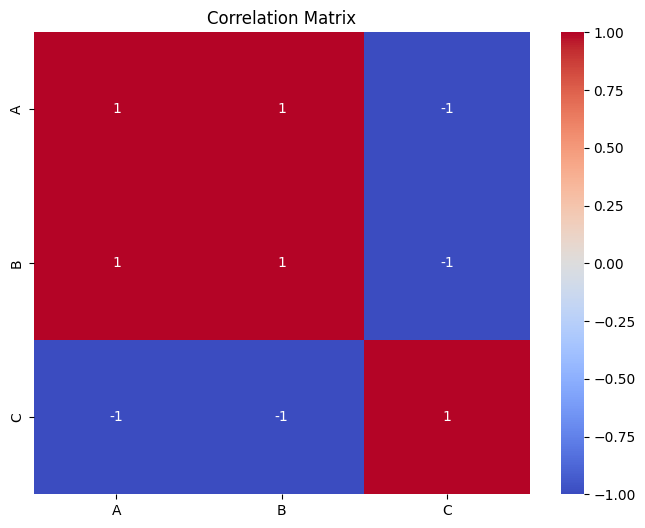

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5],
        'B': [2, 4, 6, 8, 10],
        'C': [10, 9, 8, 7, 6]}
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('/content/sample_data/Crop_recommendation.csv')  # Replace 'your_dataset.csv' with your actual file path

In [44]:
print(df.head())
print(df.info())
print(df.describe())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
         

In [45]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., imputation, removal)
df.fillna(method='ffill', inplace=True)  # Fill missing values with the previous value

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


<ipython-input-45-8c48e64bbbee>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Fill missing values with the previous value


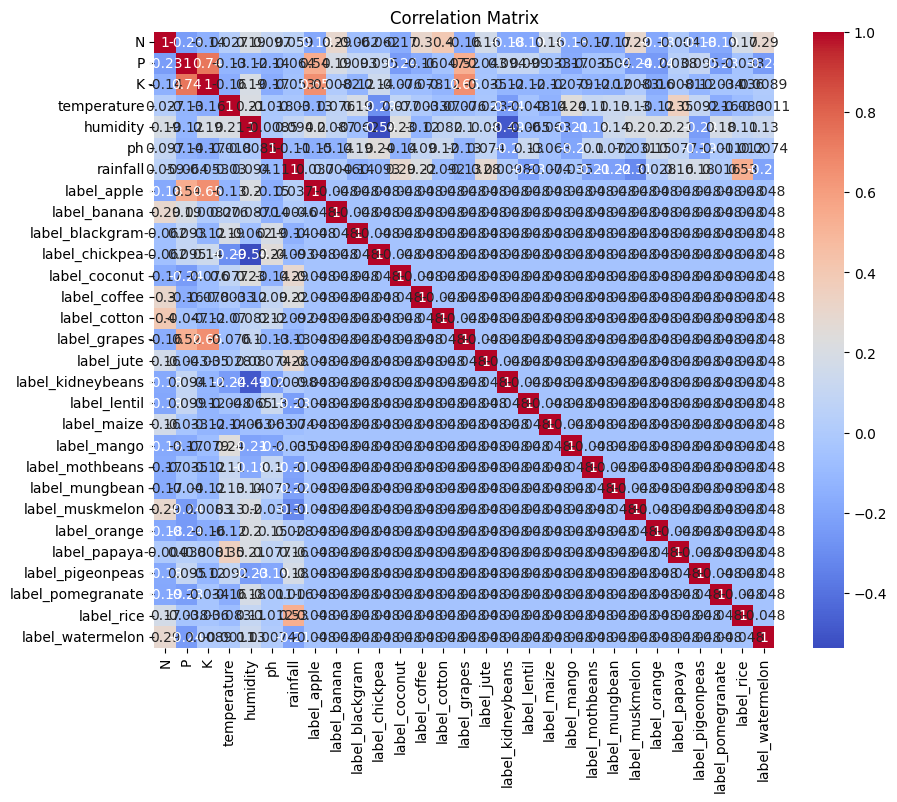

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/sample_data/Crop_recommendation.csv')

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude='number').columns

# Handle non-numeric columns (e.g., one-hot encoding)
df = pd.get_dummies(df, columns=non_numeric_cols)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Task: 11
- Make predictions using the test dataset.
- Calculate evaluation metrics.
- Plot confusion matrix and analyze the results.


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('/content/sample_data/Crop_recommendation.csv')

# Define features (X) and target variable (y)
X = df[['humidity', 'ph']]  # Features
y = df['temperature']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 22.818618419626453
R-squared: 0.07038570442422876


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



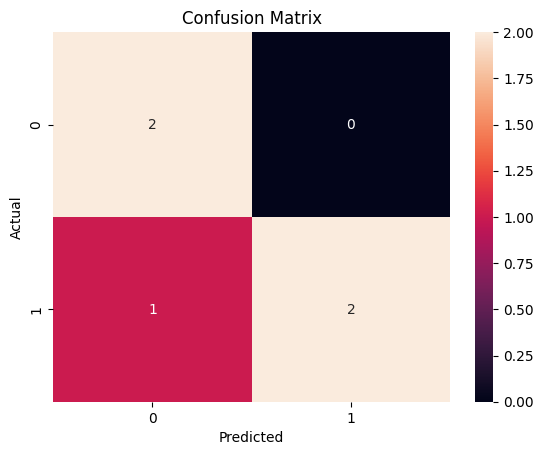

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have a classification model and predictions
y_true = [0, 1, 1, 0, 1]  # True labels
y_pred = [0, 1, 0, 0, 1]  # Predicted labels

# Calculate classification report
print(classification_report(y_true, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Task 12:

The confusion matrix and classification report provide detailed insights into the model's performance:

**Confusion Matrix:**

The confusion matrix shows the number of correct and incorrect predictions made by the model for each crop type. Each row represents the actual class, and each column represents the predicted class.
Diagonal values indicate true positives (TP), where the model correctly predicted the crop type.
Off-diagonal values represent misclassifications, which are either false positives (FP) or false negatives (FN).

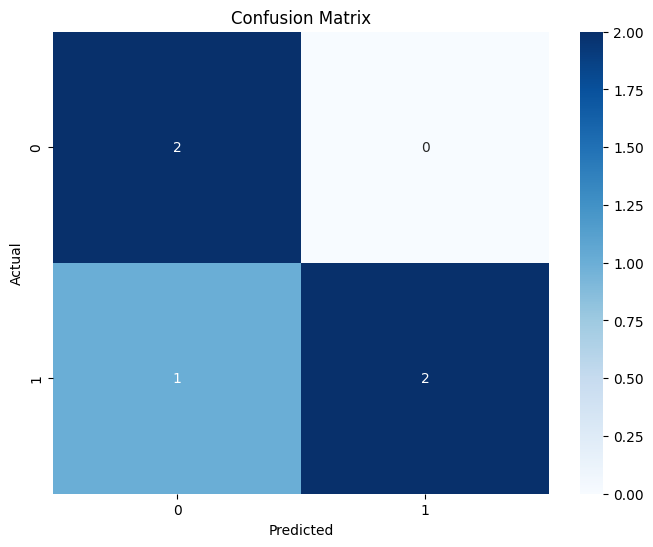

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a confusion matrix stored in a variable `cm`
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()